# Limpeza de dados e estatística descritiva

Neste desafio colocaremos em prática alguns conceitos apresentado nas aulas. Para isso, usaremos o conjunto de dados [Prestação de contas eleitorais - 2020](https://dadosabertos.tse.jus.br/dataset/prestacao-de-contas-eleitorais-2020) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.

Os dados também podem ser encontrados na pasta "Dados" deste repositório.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORTE.csv" que está na pasta dados desse repositório, usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [13]:
df = pd.read_csv('../base_dados/receitas_orgaos_partidarios_2020_NORTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 5043 non-null   float64
 12  NM_MUNICIPIO                 5043 non-null   object 
 13  NR_CNPJ_PRESTADOR_

In [15]:
df = pd.read_csv('../base_dados/receitas_orgaos_partidarios_2020_NORTE.csv',sep=';', na_values=['#NULO#'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 5043 non-null   float64
 12  NM_MUNICIPIO                 5043 non-null   object 
 13  NR_CNPJ_PRESTADOR_

# Filtre apenas os registros que sejam da prestação de contas final


In [19]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Parcial', 'Relatório Financeiro',
       'Regularização da Omissão'], dtype=object)

In [20]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(6052, 48)

In [23]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [24]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido

df_final.shape

(5912, 48)

## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [25]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

CD_CNAE_DOADOR
94928.0    2957
47814.0       2
59120.0       1
85996.0       1
Name: count, dtype: int64

In [26]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['CD_CNAE_DOADOR'].value_counts(normalize=True)

CD_CNAE_DOADOR
94928.0    0.998649
47814.0    0.000675
59120.0    0.000338
85996.0    0.000338
Name: proportion, dtype: float64

In [27]:
df_final['DS_CNAE_DOADOR'].value_counts()

DS_CNAE_DOADOR
Atividades de organizações políticas                                                 2957
Comércio varejista de artigos do vestuário e acessórios                                 2
Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão       1
Atividades de ensino não especificadas anteriormente                                    1
Name: count, dtype: int64

Como faço para confirmar quais códigos correspondem as descrições da CNAE? 

In [40]:
df_final['TIPO_DOADOR'] = df_final.loc[:, 'CD_CNAE_DOADOR'].replace(np.nan, -1)

In [42]:
df_final.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
1570,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1438431342,M,Municipal,...,NaN,NaN,NaN,P19000400310RO000018A,NaN,19198989,15/11/2020,PRESTAÇÃO DE SERVIÇO FISCAL DE URNA,100.00,-1.0
2613,13/05/2023,23:23:30,2020,2,Ordinária,Final,11/12/2020,1220374398,M,Municipal,...,NaN,NaN,NaN,P20000404120PA000007A,9200,18007557,10/12/2020,NaN,5.00,-1.0
5640,13/05/2023,23:23:30,2020,2,Ordinária,Final,21/09/2021,1219991229,M,Municipal,...,25.0,DEM,Democratas,P25000401554AC000004A,110904,20024984,09/11/2020,NaN,3250.00,94928.0
5128,13/05/2023,23:23:30,2020,2,Ordinária,Final,01/04/2021,1220312505,M,Municipal,...,45.0,PSDB,Partido da Social Democracia Brasileira,P10000402658AM000003A,NaN,19829111,10/11/2020,ASSESSORIA JURIDICA,1000.00,94928.0
459,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1220352794,M,Municipal,...,25.0,DEM,Democratas,P25000496270TO000003A,29780,19268121,15/12/2020,NaN,4.95,94928.0
2252,13/05/2023,23:23:30,2020,2,Ordinária,Final,18/04/2022,1293007003,M,Municipal,...,NaN,NaN,NaN,P13000404774PA000176A,603739000005214,20106985,15/12/2020,NaN,5000.00,-1.0
173,13/05/2023,23:23:30,2020,2,Ordinária,Final,03/05/2022,1219892370,F,Federal (Estadual/Distrital),...,18.0,REDE,Rede Sustentabilidade,P18000306050AP000001A,553596000023176,20108715,25/09/2020,NaN,460833.33,94928.0
4499,13/05/2023,23:23:30,2020,2,Ordinária,Final,13/08/2021,1220375756,M,Municipal,...,NaN,NaN,NaN,P45000404332PA000004A,NSU595731,19966081,29/12/2020,NaN,2000.00,-1.0
48,13/05/2023,23:23:30,2020,2,Ordinária,Final,24/05/2021,2035356464,F,Federal (Estadual/Distrital),...,12.0,PDT,Partido Democrático Trabalhista,P12000306050AP001804A,551251000043402,19888158,18/11/2020,NaN,100000.00,94928.0
3852,13/05/2023,23:23:30,2020,2,Ordinária,Final,08/07/2021,1220374900,M,Municipal,...,NaN,NaN,NaN,P10000404200PA000002A,0131,19936024,08/12/2020,NaN,927.30,-1.0


Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [11]:
# Mais da metade dos registros são de pessoas físicas.

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [ ]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
#df_final['TIPO_DOADOR'] = df_final[_______]


## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [48]:
df_final['TIPO_DOADOR'] = np.where(df_final['TIPO_DOADOR'] == -1, 'fisica', 'juridica')

In [50]:
df_final.sample(15)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
1652,13/05/2023,23:23:30,2020,2,Ordinária,Final,08/03/2021,1220302404,M,Municipal,...,15.0,MDB,Movimento Democrático Brasileiro,P15000400396RO000005A,550102000091322,19787912,12/11/2020,NaN,20000.00,juridica
3065,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/03/2021,1266355786,M,Municipal,...,NaN,NaN,NaN,P20000405690PA000010A,110601,19807529,06/11/2020,NaN,2750.00,fisica
1440,13/05/2023,23:23:30,2020,2,Ordinária,Final,05/04/2021,1220300510,F,Federal (Estadual/Distrital),...,13.0,PT,Partido dos Trabalhadores,P13000300035RO000226A,2020,19831239,30/09/2020,NaN,81000.00,juridica
4402,13/05/2023,23:23:30,2020,2,Ordinária,Final,14/12/2020,1220373830,M,Municipal,...,NaN,NaN,NaN,P45000404030PA000019A,NaN,18546074,01/10/2020,DOAÇÃO DE SERVIÇOS ADMINISTRATIVOS,1700.00,fisica
2039,13/05/2023,23:23:30,2020,2,Ordinária,Final,21/01/2021,1348106219,M,Municipal,...,55.0,PSD,Partido Social Democrático,P55000404243PA000003A,111101,19603971,11/11/2020,NaN,20000.00,juridica
2615,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1220374029,M,Municipal,...,NaN,NaN,NaN,P11000404073PA000002A,563,19386566,13/11/2020,NaN,8500.00,fisica
63,13/05/2023,23:23:30,2020,2,Ordinária,Final,08/04/2021,1219900108,M,Municipal,...,11.0,PP,PROGRESSISTAS,P11000406076AP000001A,850010,19835753,22/10/2020,NaN,54000.00,juridica
3236,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1220376073,M,Municipal,...,45.0,PSDB,Partido da Social Democracia Brasileira,P45000404383PA000008A,NaN,19098006,12/11/2020,"SERVI,OS CONTÁBEIS",1000.00,juridica
2137,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1453001507,M,Municipal,...,23.0,CIDADANIA,Cidadania,P23000405010PA000002A,55091400034335,18937176,06/11/2020,NaN,3000.00,juridica
1670,13/05/2023,23:23:30,2020,2,Ordinária,Final,15/12/2020,1305219438,M,Municipal,...,NaN,NaN,NaN,P25000400230RO000001A,NaN,19128530,13/11/2020,HONORARIO PRESTAÇÃO DE CONTAS,600.00,fisica


In [51]:
df_final['TIPO_DOADOR'].unique()

array(['juridica', 'fisica'], dtype=object)

Obs: No fim das contas esse exemplo nem foi muito bom, porque nesses dados só estão relacionados doações de PJ. Não tem PF nessa base das receitas dos partidos na região Norte.

## Agrupando (group by)

In [52]:
#Primeiro preciso substituir 'vírgula' por 'ponto' na varável 'VR_RECEITA'

df_final['VR_RECEITA'] = df_final['VR_RECEITA'].str.replace(',','.')

AttributeError: Can only use .str accessor with string values!

In [53]:
#convertendo os dados para FLOAT
df_final['VR_RECEITA'] = df_final['VR_RECEITA'].astype(float)

In [54]:
df_final['VR_RECEITA'].info

<bound method Series.info of 0         1000.0
1           36.0
2        15000.0
3       210000.0
4       482400.0
          ...   
6047       370.0
6048        37.0
6049       800.0
6050       265.0
6051       265.0
Name: VR_RECEITA, Length: 5912, dtype: float64>

In [57]:
# no argumento final eu poderia substituir com a função que quisesse. Ex: mean(), max(), min()

df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).sum()

VR_RECEITA
TIPO_DOADOR SG_UF             
fisica      AC       516688.26
            AM       491585.92
            AP        82687.88
            PA      4532569.87
            RO       815877.84
            RR       170414.95
            TO       414676.35
juridica    AC     22585542.95
            AM     35625509.00
            AP     33073470.04
            PA     42454506.85
            RO     22978320.93
            RR     20868194.74
            TO     24682986.39

In [1]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima



## Qual o total de doações recebidas por partido?

In [68]:
total_doacoes = df_final[['SG_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO']).sum()

print(total_doacoes)

                VR_RECEITA
SG_PARTIDO                
AVANTE           498726.86
CIDADANIA       2219623.58
DC               579762.02
DEM             2436863.08
MDB            26787221.17
NOVO              23857.14
PATRIOTA        2251979.23
PC do B          828417.19
PCB                5957.40
PDT             4233608.09
PL              1155281.57
PMB              255200.00
PMN                6161.18
PODE           10923235.59
PP             21131024.67
PROS            3186342.45
PRTB             149812.03
PSB             7195707.60
PSC              762219.20
PSD            44622192.18
PSDB            4703298.45
PSL            14133814.44
PSOL            7426889.30
PT             11252216.64
PTB             6212684.87
PTC              621471.86
PV              4670590.87
REDE           10416744.67
REPUBLICANOS    9731257.47
SOLIDARIEDADE  10855671.17
UP                15200.00


In [69]:
total_doacoes.tail()

,VR_RECEITA
SG_PARTIDO,
PV,4670590.87
REDE,10416744.67
REPUBLICANOS,9731257.47
SOLIDARIEDADE,10855671.17
UP,15200.00


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [70]:
total_doacoes_decrescente = total_doacoes.sort_values(by='VR_RECEITA',ascending=False).head(10)

print(total_doacoes_decrescente)

                VR_RECEITA
SG_PARTIDO                
PSD            44622192.18
MDB            26787221.17
PP             21131024.67
PSL            14133814.44
PT             11252216.64
PODE           10923235.59
SOLIDARIEDADE  10855671.17
REDE           10416744.67
REPUBLICANOS    9731257.47
PSOL            7426889.30


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

In [ ]:
#df_final[__________].groupby(by=_____).___().sort_values(by='____',ascending=______).head(___).plot(kind='barh')

<Axes: ylabel='SG_PARTIDO'>

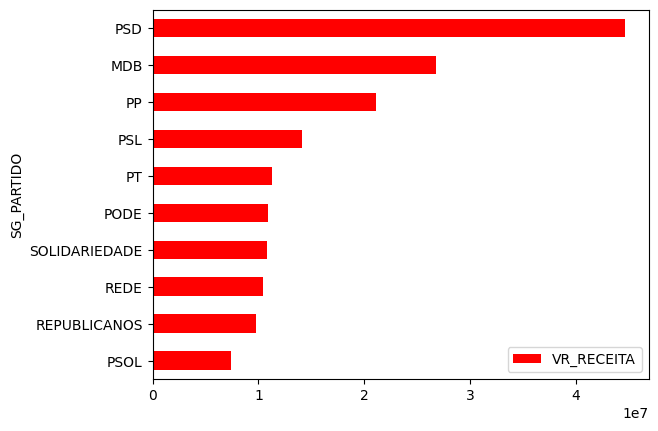

In [74]:
total_doacoes_decrescente.sort_values(by='VR_RECEITA').plot(kind='barh', color ={'red'})

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

## Qual o valor mais alto de doação por tipo de doador?

## Crie uma tabela com valor máximo, mínimo e a mediana, por estado e tipo de doador

In [77]:
df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).agg({'VR_RECEITA': ['min','median','max']})

VR_RECEITA                     
                         min    median        max
TIPO_DOADOR SG_UF                                
fisica      AC          4.80   3000.00    40560.0
            AM          2.00    500.00    35000.0
            AP         49.88    500.00    12000.0
            PA          0.10   1000.00   200000.0
            RO          1.20    600.00   110000.0
            RR         23.74    300.00    30000.0
            TO          0.01    561.65    30000.0
juridica    AC         10.00   2550.00  4900000.0
            AM          0.04   1500.00  6900000.0
            AP          0.55  20000.00  4900000.0
            PA          0.10    463.00  4400000.0
            RO          0.40   7000.00  2900000.0
            RR         12.50   2045.00  2900000.0
            TO          0.05    600.00  4900000.0

# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.